### This recipe:
- imports a HAADF-EBIC file
- corrects the scale
- converts the greyscale tif value to ebic current

In [63]:
%matplotlib inline

import ebic

import glob2
import numpy as np
import matplotlib.pyplot as plt
import hyperspy.api as hs

In [64]:
files = glob2.glob('good*')
files

['good_4frames_2019.09.20_120.tif']

In [65]:
raw_tif = hs.load(files[0])

In [66]:
for i in range(1, 3):
    raw_tif.axes_manager[i].scale = ebic.Pull_Meta_dictionary(files[0])['Scale']*1e09 #convert to nm
    raw_tif.axes_manager[i].units = 'nm'


HAADFs, EBIC_raw = raw_tif.split(axis=0)

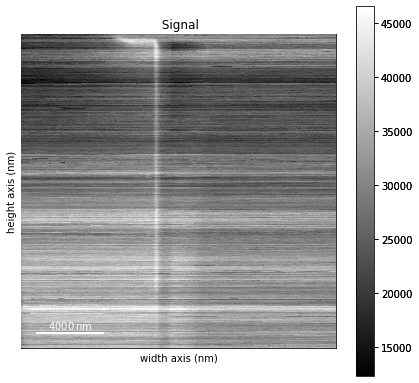

In [67]:
EBIC_raw.plot()

In [79]:
metadata = ebic.Pull_Meta_dictionary(files[0])

EBIC = hs.signals.Signal2D(ebic.greyscale_to_current(EBIC_raw.data, metadata), )

for i, name in enumerate(['x', 'y']):
    EBIC.axes_manager[i].scale = metadata['Scale']*1e09 #convert to nm
    EBIC.axes_manager[i].units = 'nm'
    EBIC.axes_manager[i].name = name
EBIC.set_signal_type('EBIC')


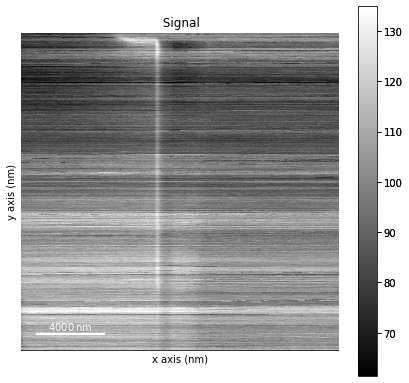

In [80]:
EBIC.plot()

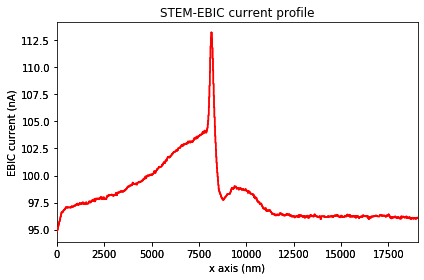

In [83]:
EBIC.mean(axis=1).plot()
plt.ylabel('EBIC current (nA)')
plt.title('STEM-EBIC current profile')

plt.savefig('Example_lineprofile.png', bbox='tight', dpi=400)
plt.show()